In [1]:
import ast
import glob
import json
import re
from collections import OrderedDict

import matplotlib.pyplot as plt
import numpy as np

In [2]:
XGBoost_files = glob.glob("experiment_xgboost_5_fold_*-*.out")

XGBoost_NDCGs = []
XGBoost_runtimes = []
for file in XGBoost_files:
    with open(file, "r") as f:
        lines = f.readlines()
    time = []
    for i in eval(lines[1]):
        time.append(i["time"])
    XGBoost_runtimes.append(time)
    XGBoost_NDCGs.append(eval(lines[0])["test"]["NDCG@5"])

In [3]:
Without_Hessian_files = glob.glob("experiment_without_hessian_5_fold_*-*.out")

Without_Hessian_NDCGs = []
Without_Hessian_runtimes = []
for file in Without_Hessian_files:
    with open(file, "r") as f:
        lines = f.readlines()
    time = []
    for i in eval(lines[1]):
        time.append(i["time"])
    Without_Hessian_runtimes.append(time)
    Without_Hessian_NDCGs.append(eval(lines[0])["test"]["NDCG@5"])

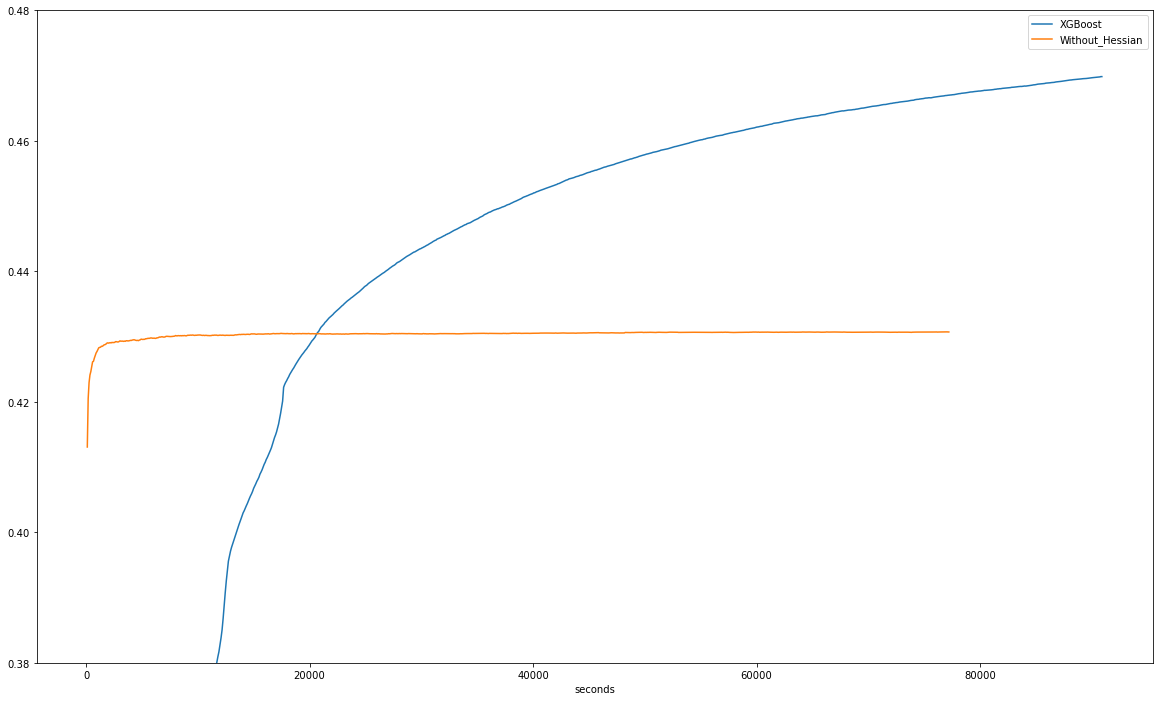

In [4]:
plt.figure(figsize=(20, 12))
# plt.plot(
#     np.mean(np.array(NN_runtimes), axis=0),
#     np.mean(np.array(NN_NDCGs), axis=0),
#     label="NN",
# )
# plt.plot(
#     np.mean(np.array(NN_log_runtimes), axis=0),
#     np.mean(np.array(NN_log_NDCGs), axis=0),
#     label="NN_log",
# )
plt.plot(
    np.mean(np.array(XGBoost_runtimes), axis=0),
    np.mean(np.array(XGBoost_NDCGs), axis=0),
    label="XGBoost",
)
# plt.plot(
#     np.mean(np.array(XGBoost_shared_runtimes), axis=0),
#     np.mean(np.array(XGBoost_shared_NDCGs), axis=0),
#     label="XGBoost_shared",
# )
# plt.plot(
#     np.mean(np.array(XGBoost_log_runtimes), axis=0),
#     np.mean(np.array(XGBoost_log_NDCGs), axis=0),
#     label="XGBoost_log",
# )
plt.plot(
    np.mean(np.array(Without_Hessian_runtimes), axis=0),
    np.mean(np.array(Without_Hessian_NDCGs), axis=0),
    label="Without_Hessian",
)
plt.ylim(0.38, 0.48)
plt.legend()
plt.xlabel("seconds")
plt.show()

In [7]:
np.mean(np.array(XGBoost_NDCGs), axis=0)

array([0.13282668, 0.1342062 , 0.13552784, 0.1369458 , 0.13772428,
       0.1385704 , 0.13917352, 0.14024964, 0.14133288, 0.14254336,
       0.1433982 , 0.14382324, 0.14444688, 0.14479428, 0.14574768,
       0.1462124 , 0.14674404, 0.14794412, 0.14904924, 0.14930204,
       0.14982348, 0.1498618 , 0.15041756, 0.15118412, 0.15238144,
       0.15326092, 0.15367708, 0.15379888, 0.15447284, 0.15466744,
       0.15565644, 0.15649332, 0.15767268, 0.15753384, 0.157917  ,
       0.15928164, 0.16049484, 0.16086432, 0.16165152, 0.16221848,
       0.16296036, 0.16386676, 0.16563112, 0.16710276, 0.16854184,
       0.17054596, 0.17278408, 0.17532468, 0.177175  , 0.17933088,
       0.181984  , 0.18486148, 0.18634896, 0.18806412, 0.18944572,
       0.190847  , 0.19241276, 0.1947726 , 0.19663108, 0.20007504,
       0.20396728, 0.20883836, 0.21576712, 0.22090632, 0.22609236,
       0.2344726 , 0.24003276, 0.24478468, 0.24963128, 0.25361924,
       0.2576006 , 0.25973164, 0.26181124, 0.26393676, 0.26567